# Predicting Car Prices
## Introduction
This will be a project using machine learning k-nearest neighbors algorithms to predict car prices. We'll be using a dataset (more information at https://archive.ics.uci.edu/ml/datasets/automobile) that contains information on various cars. For each car, we have technical information such as motor displacement, weight, mpg, etc. Let's get a feel for the dataset and get started!

## Getting Familiar
First let's see the dataset as a whole and determine which columns are relevant.

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np

# set max columns to avoid truncating
pd.options.display.max_columns = 99

# read in the dataset
cars = pd.read_csv('imports-85.data')

In [2]:
# display first 5 rows
cars.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


Already we see that the column names are funky. We can use the documentation to get the correct names and adjust accordingly.

In [3]:
# set cols to correct names
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 
        'city-mpg', 'highway-mpg', 'price']

# rename columns
cars.columns = cols

# see first 5 rows again 
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [4]:
# see first 5 rows again 
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


The good news is it looks like most of the data can be easily determined to be discrete or continuous, numerical or not.

## Cleaning Up
The second column, normalized-losses, looks already to have a lot of missing values with the '?' value. We can replace this with NaN for efficiency, and while we're at it, rescale any numerical columns as well to range from 0 to 1. This makes the model more viable.

In [5]:
# replace ? with NaN
cars['normalized-losses'].replace(to_replace = '?', value = np.nan, inplace = True)

# check values
cars['normalized-losses'].value_counts()

161    11
91      8
150     7
104     6
134     6
128     6
65      5
103     5
102     5
94      5
85      5
74      5
95      5
168     5
93      4
106     4
148     4
122     4
118     4
101     3
137     3
83      3
115     3
154     3
125     3
108     2
129     2
158     2
192     2
164     2
110     2
81      2
197     2
87      2
113     2
89      2
153     2
119     2
194     2
188     2
145     2
186     1
121     1
107     1
78      1
98      1
142     1
77      1
231     1
256     1
90      1
Name: normalized-losses, dtype: int64

In [6]:
# Select only the columns with continuous values
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 
                          'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 
                          'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols]

# display new df
numeric_cars.dtypes

normalized-losses     object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
bore                  object
stroke                object
compression-rate     float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [7]:
cars['bore'].value_counts()

3.62    23
3.19    20
3.15    15
3.03    12
2.97    12
3.46     9
3.31     8
3.78     8
3.43     8
2.91     7
3.27     7
3.54     6
3.58     6
3.05     6
3.39     6
3.70     5
3.01     5
3.35     4
?        4
3.59     3
3.17     3
3.74     3
3.33     2
3.24     2
3.63     2
3.94     2
3.13     2
3.80     2
3.50     2
3.76     1
3.47     1
2.99     1
2.54     1
3.34     1
2.68     1
3.61     1
2.92     1
3.60     1
3.08     1
Name: bore, dtype: int64

It looks like object types in the numeric df we took still all have potential '?' values, and we can get rid of all of them now, just to be sure.

In [9]:
# replace ? with NaN
numeric_cars['bore'].replace(to_replace = '?', value = np.nan, inplace = True)
numeric_cars['stroke'].replace(to_replace = '?', value = np.nan, inplace = True)
numeric_cars['horsepower'].replace(to_replace = '?', value = np.nan, inplace = True)
numeric_cars['peak-rpm'].replace(to_replace = '?', value = np.nan, inplace = True)
numeric_cars['price'].replace(to_replace = '?', value = np.nan, inplace = True)

# now convert the types - float bc we will be normalizing
numeric_cars = numeric_cars.astype(float)

# display types again
numeric_cars.dtypes

normalized-losses    float64
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          float64
bore                 float64
stroke               float64
compression-rate     float64
horsepower           float64
peak-rpm             float64
city-mpg             float64
highway-mpg          float64
price                float64
dtype: object

Now we can check all of our missing rows. Note: the above cell has a SettingWithCopyWarning when ran the first time, but not subsequent times.

In [10]:
# see missing rows
numeric_cars.isnull().sum()

normalized-losses    40
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Because we are ultimately trying to predict the 'price' column, it is best to remove missing rows here instead of trying to estimate values. With only for rows being removed, this probably won't affect the data much. For the other columns, it looks like filling in the missing values with the column mean won't hurt.

In [11]:
# drop missing rows in price column
numeric_cars = numeric_cars.dropna(subset=['price'])

# replace other missing values using column means
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

# see missing rows again
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Finally, we normalize what we have (except price of course):

In [12]:
# normalize all columnns to range from 0 to 1
price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col

# display first 5 rows to confirm
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,16500.0
1,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.12500,0.495327,0.346939,0.166667,0.263158,16500.0
2,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.18750,0.252336,0.551020,0.305556,0.368421,13950.0
3,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.06250,0.313084,0.551020,0.138889,0.157895,17450.0
4,0.298429,0.384840,0.540299,0.512821,0.441667,0.395268,0.464286,0.633333,0.09375,0.289720,0.551020,0.166667,0.236842,15250.0


## Univariate Models
Now that the data is cleaned up, let's start by making some simple one variable models to help structure the workflow and understand which features are important better.

In [13]:
# import k-nearest neighbor libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# create learning function - returns the rmse
def knn_train_test(train_col, target_col, df):
    # initialize 
    knn = KNeighborsRegressor()
    
    # set random seed - for workbook explanations (real applications can comment this part out)
    np.random.seed(1)
    
    # randomize order of rows to split
    shuffle= np.random.permutation(df.index)
    rand = df.reindex(shuffle)
    
    # get split spot
    divider = int(len(rand) / 2)
    
    # make a training set and test set
    train_df = rand.iloc[:divider]
    test_df = rand.iloc[divider:]
    
    # fit the model
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    # make predictions
    predictions = knn.predict(test_df[[train_col]])
    
    # calculate RMSE
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = np.sqrt(mse)
    
    return rmse

In [14]:
# empty rmse reference dict
rmses = {}

# get list of train columns (not price)
train_cols = numeric_cars.columns.tolist()
train_cols.remove('price')

# train each column separately
for col in train_cols:
    value = knn_train_test(col, 'price', numeric_cars)
    rmses[col] = value
    
# convert the results into a series for display
rmses_series = pd.Series(rmses)
rmses_series.sort_values()

curb-weight          3439.491639
highway-mpg          3737.162047
width                3773.135499
city-mpg             3813.193148
horsepower           4456.175620
length               5150.449177
wheel-base           5443.857347
bore                 6206.924562
peak-rpm             6458.378473
compression-rate     7193.588599
height               7380.628859
stroke               8184.186086
normalized-losses    8291.523386
dtype: float64

It looks like for the default k value (5), curb-weight displayed the most viable model. We can adjust the k values, however, and update the function to do so in order to find better model variants below:

In [15]:
# create learning function - returns the rmse dict
def knn_train_test(train_col, target_col, df, ks):    
    # set random seed - for workbook explanations (real applications can comment this part out)
    np.random.seed(1)
    
    # randomize order of rows to split
    shuffle= np.random.permutation(df.index)
    rand = df.reindex(shuffle)
    
    # get split spot
    divider = int(len(rand) / 2)
    
    # make a training set and test set
    train_df = rand.iloc[:divider]
    test_df = rand.iloc[divider:]
    
    # empty k dict
    k_rmses = {}
    
    # loop for different k's
    for k in ks:
        # initialize 
        knn = KNeighborsRegressor(n_neighbors = k)
        
        # fit the model
        knn.fit(train_df[[train_col]], train_df[target_col])

        # make predictions
        predictions = knn.predict(test_df[[train_col]])

        # calculate RMSE
        mse = mean_squared_error(test_df[target_col], predictions)
        rmse = np.sqrt(mse)
        
        # store in dict
        k_rmses[k] = rmse
    
    return k_rmses

In [16]:
# empty rmse reference dict
rmses = {}

# get list of train columns (not price)
train_cols = numeric_cars.columns.tolist()
train_cols.remove('price')

# make list of k values
ks = [1, 3, 5, 7, 9]

# train each column separately
for col in train_cols:
    value = knn_train_test(col, 'price', numeric_cars, ks)
    rmses[col] = value
    
# display full results
rmses

{'bore': {1: 5926.514010782393,
  3: 5927.911351770069,
  5: 6206.9245622933095,
  7: 6239.1231894606235,
  9: 6407.868283419558},
 'city-mpg': {1: 4170.034286429789,
  3: 3438.0091973569693,
  5: 3813.193148373158,
  7: 3706.737982542668,
  9: 3811.0390099593706},
 'compression-rate': {1: 7344.202947903877,
  3: 5943.417906577177,
  5: 7193.5885991346495,
  7: 7540.580427735179,
  9: 7180.410828835924},
 'curb-weight': {1: 4390.877922466076,
  3: 3668.3589437240184,
  5: 3439.4916393560256,
  7: 3174.0695108639184,
  9: 3373.692477825783},
 'height': {1: 10910.35914761746,
  3: 7805.349593138741,
  5: 7380.628859304605,
  7: 7272.536203121596,
  9: 7121.205659190993},
 'highway-mpg': {1: 3667.7066335790814,
  3: 3602.7490403548477,
  5: 3737.1620469013646,
  7: 3963.0230166902043,
  9: 3972.4730855050143},
 'horsepower': {1: 4183.096630487993,
  3: 4176.022383933198,
  5: 4456.175620282486,
  7: 4658.0497482468845,
  9: 4591.4584980438685},
 'length': {1: 6487.918747179253,
  3: 6134.

This is a lot of data, and while we can't sort them into a simple Series like before, a scatter plot would probably be better here anyway. We can visualize ths information now in simple plots.

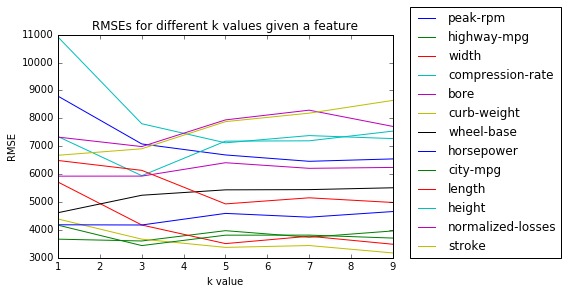

In [17]:
# get matplotlib and inline it
import matplotlib.pyplot as plt
%matplotlib inline

# plot each feature on a separate line
for feature,dic in rmses.items():
    # set x to keys and sort it since dicts are unordered, set y to values
    x = list(dic.keys())
    x.sort()
    y = list(dic.values())

    # plot and adjust as necessary
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    plt.title('RMSEs for different k values given a feature')
    plt.legend(rmses.keys(), loc = (1.05,0))

# show plot outside of loop to get one plot
plt.show()

While difficult to see, we can make out that curb weight still holds king in low RMSE values, and by going to 7 or 9 in k value, we can reduce the RMSE further (to ~3174 at its lowest).  We don't need to refine this further though, as univariate models were just to get a big picture. We can now focus in on multivariate models.

## Multivariate Models
To adjust to multiple columns to train, we first have to adjust our function from before again. Hopefully this will make the model even more efficient.

In [18]:
# create learning function - returns the rmse
def knn_train_test(train_cols, target_col, df):    
    # set random seed - for workbook explanations (real applications can comment this part out)
    np.random.seed(1)
    
    # randomize order of rows to split
    shuffle= np.random.permutation(df.index)
    rand = df.reindex(shuffle)
    
    # get split spot
    divider = int(len(rand) / 2)
    
    # make a training set and test set
    train_df = rand.iloc[:divider]
    test_df = rand.iloc[divider:]

    # initialize 
    knn = KNeighborsRegressor()
        
    # fit the model
    knn.fit(train_df[train_cols], train_df[target_col])

    # make predictions
    predictions = knn.predict(test_df[train_cols])

    # calculate RMSE
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = np.sqrt(mse)
    
    return rmse

In [19]:
# empty rmse reference dict
rmses = {}

# get list of train columns -
# 2 best individual features from rmses_series before 
# then we add the third best feature, fourth, fifth afterwards
train_cols_master = ['curb-weight', 'highway-mpg', 'width', 'city-mpg', 'horsepower']
train_conditions = [2, 3, 4, 5]

# train each case respectively
for condition in train_conditions:
    train_cols = train_cols_master[:condition]
    value = knn_train_test(train_cols, 'price', numeric_cars)
    rmses[condition] = value
    
# convert the results into a series for display
rmses_series = pd.Series(rmses)
rmses_series.sort_values()

5    2692.444347
4    3048.225387
3    3272.998460
2    3359.573536
dtype: float64

Adding up to 5 of our best features (using the default k value) reduces the RMSE to about 2692, which is better than using any other variation. This is promising, but perhaps we can reduce even further by messing with the k value like before.

## Optimization
We know that using 5 features gives us a semi-optimal result, so now by varying k from 1 all the way to 25 - hopefully we can get a final optimal model. We'll include the top 3 models (5, 4, 3 features respectively) just to be safe.

In [20]:
# create learning function - returns the rmse dict
def knn_train_test(train_cols, target_col, df, ks):    
    # set random seed - for workbook explanations (real applications can comment this part out)
    np.random.seed(1)
    
    # randomize order of rows to split
    shuffle= np.random.permutation(df.index)
    rand = df.reindex(shuffle)
    
    # get split spot
    divider = int(len(rand) / 2)
    
    # make a training set and test set
    train_df = rand.iloc[:divider]
    test_df = rand.iloc[divider:]
    
    # empty k dict
    k_rmses = {}
    
    # loop for different k's
    for k in ks:
        # initialize 
        knn = KNeighborsRegressor(n_neighbors = k)
        
        # fit the model
        knn.fit(train_df[train_cols], train_df[target_col])

        # make predictions
        predictions = knn.predict(test_df[train_cols])

        # calculate RMSE
        mse = mean_squared_error(test_df[target_col], predictions)
        rmse = np.sqrt(mse)
        
        # store in dict
        k_rmses[k] = rmse
    
    return k_rmses

In [25]:
# empty rmse reference dict
rmses = {}

# make list of k values and train cols
train_cols_master = ['curb-weight', 'highway-mpg', 'width', 'city-mpg', 'horsepower']
train_conditions = [3, 4, 5]
ks = [k for k in range(1,26)]

# train each case respectively
for condition in train_conditions:
    train_cols = train_cols_master[:condition]
    value = knn_train_test(train_cols, 'price', numeric_cars, ks)
    rmses[condition] = value

# display full results
rmses

{3: {1: 3599.5947341332744,
  2: 3441.765352257472,
  3: 3676.411642711772,
  4: 3460.696619630938,
  5: 3272.9984597002176,
  6: 3277.3085190696747,
  7: 3379.395689849211,
  8: 3397.7988922287986,
  9: 3387.834098726475,
  10: 3392.5448498877654,
  11: 3437.008164375446,
  12: 3464.351088968739,
  13: 3478.3118240499143,
  14: 3592.179297992873,
  15: 3625.7642195328203,
  16: 3663.287569993482,
  17: 3704.45103363349,
  18: 3756.6546588670685,
  19: 3782.746464880025,
  20: 3825.2242835290067,
  21: 3867.280428387807,
  22: 3888.826609609567,
  23: 3925.693916344016,
  24: 3979.347479275462,
  25: 4016.8611097900807},
 4: {1: 3392.556085019082,
  2: 3080.253534207858,
  3: 3312.9860490365954,
  4: 2971.375074565646,
  5: 3048.2253868767643,
  6: 2886.2445924110834,
  7: 3024.731252693437,
  8: 3112.553881109932,
  9: 3074.7320504957306,
  10: 3124.272240394553,
  11: 3219.529470061587,
  12: 3388.0728641072637,
  13: 3484.1543085686026,
  14: 3553.0426725999682,
  15: 3596.378285114

Again, a lot of data, but nothing a plot cannot fix, very similar to our last one:

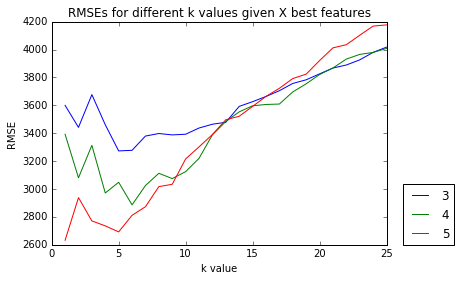

In [26]:
# plot each feature on a separate line
for feature,dic in rmses.items():
    # set x to keys and sort it since dicts are unordered, set y to values
    x = list(dic.keys())
    x.sort()
    y = list(dic.values())

    # plot and adjust as necessary
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    plt.title('RMSEs for different k values given X best features')
    plt.legend(rmses.keys(), loc = (1.05,0))

# show plot outside of loop to get one plot
plt.show()

This plot is much more comprehensive because we're just comparing our top 3 models compared to several in the univariate version. We can see clearly that the best k values, regardless of model, seem to hover around 5 (1 for 5 features, 6 for 4 features, and 5 for 3 features). 

We note that while a k value of 1 with the 5 feature model provides the best RMSE, a k value of 1 is concerning due to high dependability on just that one neighbor. A k value of 5 provides almost the exact same RMSE and provides a bit more breathing room, so we take that as our optimum. As we increase our k value to 15+, the prices seem to use 'neighbors' that are not really neighbors and probably outside of their own pricing cluster, so more discrepencies occur. There can be too much of a good thing!

Note: Setting the random state to 1 produced these results. Commenting it out may produce slightly different results to the point where some models on the brink of outperforming others may actually do so due to variance in future runs. 

## Further Analysis / Next Steps
## K-Fold Cross Validation 
In our steps in the project, we used test/train validation. We can modify/make the function to use k-fold cross validation instead by making the following changes:

In [24]:
# get KFold from library
from sklearn.model_selection import cross_val_score, KFold

# create learning function - returns the average rmses and std rmses
def knn_fold_test(train_cols, target_col, df, folds):    
    # empty lists to return
    avg_rmses_list = []
    std_rmses_list = []
    
    # loop the folds list
    for fold in folds:
        # produce the cross val score from fold
        kf = KFold(fold, shuffle=True, random_state=1)
        model = KNeighborsRegressor()
        mses = cross_val_score(model, df[train_cols], df[target_col], scoring="neg_mean_squared_error", cv=kf)
        rmses = np.sqrt(np.absolute(mses))
        
        # compute avg and std of said score
        avg_rmse = np.mean(rmses)
        std_rmse = np.std(rmses)
        avg_rmses_list.append(avg_rmse)
        std_rmses_list.append(std_rmse)
        
        # print to screen and return the lists
        print(str(fold), "folds: ", "avg RMSE: ", str(avg_rmse), "std RMSE: ", str(std_rmse))
    
    return avg_rmses_list, std_rmses_list

Let's try out our "best" model of 5 featues for the fold test.

In [34]:
# make list of desired fold values and train cols
train_cols_master = ['curb-weight', 'highway-mpg', 'width', 'city-mpg', 'horsepower']
folds = [3, 5, 7, 9, 10, 11, 13, 15, 17, 19, 21, 23]

# train each case respectively
avg_five_feature_rmses, std_five_feature_rmses = knn_fold_test(train_cols_master, 'price', numeric_cars, folds)

3 folds:  avg RMSE:  3176.486046320731 std RMSE:  574.4721885120306
5 folds:  avg RMSE:  2896.491340380608 std RMSE:  1107.6363074132892
7 folds:  avg RMSE:  2910.8620031858927 std RMSE:  1042.8896849834043
9 folds:  avg RMSE:  2994.1383040070427 std RMSE:  919.310036545787
10 folds:  avg RMSE:  2852.363877019157 std RMSE:  1246.967854227303
11 folds:  avg RMSE:  2801.2770908766215 std RMSE:  1296.2646716224376
13 folds:  avg RMSE:  2919.521786186364 std RMSE:  1116.4481835822953
15 folds:  avg RMSE:  2759.8673227134445 std RMSE:  1351.148971885526
17 folds:  avg RMSE:  2814.1803326274858 std RMSE:  1245.9376135723378
19 folds:  avg RMSE:  2795.6418322239133 std RMSE:  1214.7774344858362
21 folds:  avg RMSE:  2714.9272970690386 std RMSE:  1331.705485430507
23 folds:  avg RMSE:  2736.6998837371525 std RMSE:  1338.1120332855498


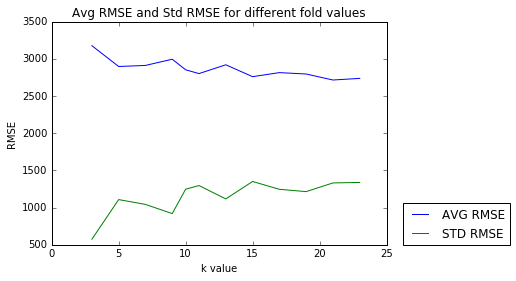

In [33]:
# plot each list on a separate line
plt.plot(x, avg_five_feature_rmses)
plt.plot(x, std_five_feature_rmses)
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.title('Avg RMSE and Std RMSE for different fold values')
plt.legend(['AVG RMSE','STD RMSE'], loc = (1.05,0))

# show plot outside of loop to get one plot
plt.show()

As we can see, theres always a tradeoff between low bias and low variance, i.e. low average RMSE and low RMSE standard deviation. We want to find the optimal point where they meet most of the time, but we can also try to find the fold where they produce the least sum as well.

In [39]:
# dict of sums at different folds created and arbitrary lowest sum starting point
sum_metrics = {}
lowest_fold, lowest_sum = 0, 10000

# loop through elements
for i in range(12):
    # add together and replace lowest sum if necessary
    add = avg_five_feature_rmses[i] + std_five_feature_rmses[i]
    if lowest_sum > add:
        lowest_fold = folds[i]
        lowest_sum = add
        
    # add final sum to dict
    sum_metrics[folds[i]] = add

# display results
print(sum_metrics, "\n\nlowest sum: ", lowest_fold, ":", lowest_sum)

{3: 3750.9582348327617, 5: 4004.1276477938973, 7: 3953.7516881692973, 9: 3913.44834055283, 10: 4099.33173124646, 11: 4097.541762499059, 13: 4035.969969768659, 15: 4111.0162945989705, 17: 4060.1179461998236, 19: 4010.4192667097495, 21: 4046.6327824995456, 23: 4074.8119170227023} 

lowest sum:  3 : 3750.9582348327617


While obviously not a perfect way to choose how many folds to train our dataset on, it does make sense that the lowest folds will be 3 since our dataset is already quite small (only ~2500 rows). The 3 fold margin of error also falls within our optimal k-value picked RMSE from before, so this is also promising.

## All in One!
Lastly, we can try to combine everything we did so far, and make our train_test function clean the data as well! This is simply combining our steps into a neatly packed function, and pretty much involves copy and pasting our code togeher, so we'll avoid redundancy.

While this is an option, I personally like to keep data cleaning outside of the model function itself as I can focus on the two separate tasks and make sure the cleanup is completed before I even think about any training. There is no right or wrong for this, just whatever you prefer and whatever works best.

If combining into an all-in-one function is the way to go for you, the advantages include being able to run a model with just a single line of code! The disadvantages include being less robust, and if there's an error - sometimes not knowing where it is, because your function does literally everything. Pros and cons as always!

## Conclusion
The 'best' model turns out to be the 5 feature model using a k value of 5 for optimum results, and a fold value of 3 for optimum results. Using this model, we will probably get a decent price prediction on cars. If we have a new car with these 5 features at hand, we can simply plug it into the test portion of the model and out comes a predicted price!

This project showed the ins and outs of a k-nearest neighbors machine learning algorithm model, which as we saw can be easily implemented. There was obviously no 'right' answer, and we often have to choose the 'best' metrics to the best of our ability, but that's where critical thinking and being involved in ML come into play!

Next, we'll work on other similar techniques such as linear regression, another very popular ML algorithm.